In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic

In [2]:
df = pd.read_csv('../data/raw/hurdat2_cleaned.csv', parse_dates=['observation_datetime','formation_datetime'])

In [5]:
df = df[['code','observation_datetime','lat','lon']]
df.head()

,code,observation_datetime,lat,lon
0,AL011851,1851-06-25 00:00:00,28.0,265.2
1,AL011851,1851-06-25 06:00:00,28.0,264.6
2,AL011851,1851-06-25 12:00:00,28.0,264.0
3,AL011851,1851-06-25 18:00:00,28.1,263.5
4,AL011851,1851-06-25 21:00:00,28.2,263.2


In [8]:
df.loc[1,'observation_datetime'] - df.loc[0,'observation_datetime']

Timedelta('0 days 06:00:00')

In [15]:
for i in range(1, len(df)):
	if df.loc[i, 'code'] == df.loc[i - 1, 'code']:
		time_since_last = (df.loc[i,'observation_datetime'] - df.loc[i-1,'observation_datetime']) / pd.Timedelta(hours = 1)
		curr_coords = (df.loc[i,'lat'],df.loc[i,'lon'])
		prev_coords = (df.loc[i-1,'lat'],df.loc[i-1,'lon'])
		dist_since_last = geodesic(curr_coords, prev_coords).kilometers
		df.loc[i,'forward_speed_kmph'] = dist_since_last / time_since_last
	else:
		df.loc[i,'forward_speed_kmph'] = np.nan

df.head()

,code,observation_datetime,lat,lon,forward_speed_kmph
0,AL011851,1851-06-25 00:00:00,28.0,265.2,NaN
1,AL011851,1851-06-25 06:00:00,28.0,264.6,9.836177
2,AL011851,1851-06-25 12:00:00,28.0,264.0,9.836177
3,AL011851,1851-06-25 18:00:00,28.1,263.5,8.398639
4,AL011851,1851-06-25 21:00:00,28.2,263.2,10.494196


In [17]:
gb = df.groupby('code').agg({'forward_speed_kmph':'mean'})

In [20]:
gb

,forward_speed_kmph
code,
AL011851,9.842744
AL011852,18.861590
AL011853,NaN
AL011854,18.063247
AL011855,NaN
...,...
AL301969,11.793053
AL302005,15.878633
AL302020,16.504938


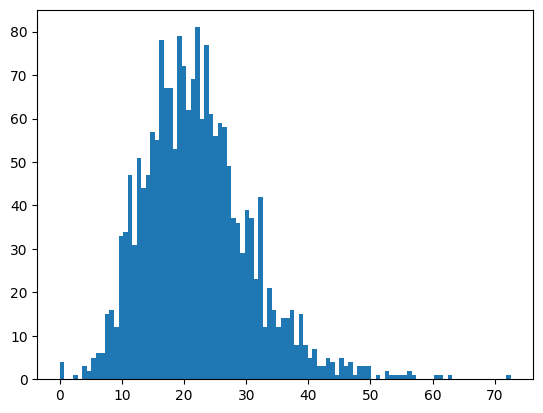

In [22]:
plt.hist(gb['forward_speed_kmph'], bins=100)
plt.show()

In [24]:
gb = gb.reset_index()

In [26]:
gb.columns = ['code','mean_forward_speed_kmph']

In [27]:
gb

,code,mean_forward_speed_kmph
0,AL011851,9.842744
1,AL011852,18.861590
2,AL011853,NaN
3,AL011854,18.063247
4,AL011855,NaN
...,...,...
1986,AL301969,11.793053
1987,AL302005,15.878633
1988,AL302020,16.504938
1989,AL312005,11.725923
